# Multi-class classification

In this notebook, we will build a network to classify Reuters newswires into 46 different mutually-exclusive topics. Since we have many classes, this problem is an instance of "multi-class classification", and since each data point should be classified into only one category, the problem is more specifically an instance of "single-label, multi-class classification". If each data point could have belonged to multiple categories (in our case, topics) then we would be facing a "multi-label, multi-class classification" problem.

## The Reuters dataset

It is a  set of short newswires and their topics, published by Reuters in 1986. It's a very simple, widely used toy dataset for text classification. There are 46 different topics; some topics are more represented than others, but each topic has at least 10 examples in the training set.

In [1]:
import keras
keras.__version__

Using TensorFlow backend.
/Users/abhishekdas/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/abhishekdas/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/abhishekdas/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/abhishekdas/.local/lib/python3.7/site-pa

'2.3.1'

In [2]:
from keras.datasets import reuters
(train_data, train_labels),(test_data, test_labels)=reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 2s 1us/step


/Users/abhishekdas/opt/anaconda3/lib/python3.7/site-packages/keras/datasets/reuters.py:85: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/Users/abhishekdas/opt/anaconda3/lib/python3.7/site-packages/keras/datasets/reuters.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [5]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [7]:
train_labels[0]

3

In [10]:
NUM_WORDS=1000 # only use top 1000 words
INDEX_FROM=3

word_index=reuters.get_word_index()
word_index={k:(v+INDEX_FROM) for k,v in word_index.items()}
word_index["<PAD>"]=0
word_index["<START>"]=1
word_index["<UNK>"]=2
word_index["<UNUSED>"]=3

id_to_word={value:key for key,value in word_index.items()}
print(' '.join(id_to_word[id] for id in train_data[0] ))

## Data Preparation
We will now vectorise our data

In [13]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [14]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

## Design our Neural Network


In [19]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(64, activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [20]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Validation set
Let us take out 1000 samples for our validation set

In [23]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [24]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 110us/step - loss: 2.6207 - accuracy: 0.5406 - val_loss: 1.7464 - val_accuracy: 0.6530
Epoch 2/20
7982/7982 [==============================] - 1s 79us/step - loss: 1.4307 - accuracy: 0.7006 - val_loss: 1.3241 - val_accuracy: 0.7090
Epoch 3/20
7982/7982 [==============================] - 1s 88us/step - loss: 1.0797 - accuracy: 0.7680 - val_loss: 1.1686 - val_accuracy: 0.7340
Epoch 4/20
7982/7982 [==============================] - 1s 84us/step - loss: 0.8649 - accuracy: 0.8190 - val_loss: 1.0505 - val_accuracy: 0.7730
Epoch 5/20
7982/7982 [==============================] - 1s 91us/step - loss: 0.7025 - accuracy: 0.8482 - val_loss: 1.0063 - val_accuracy: 0.7890
Epoch 6/20
7982/7982 [==============================] - 1s 80us/step - loss: 0.5666 - accuracy: 0.8799 - val_loss: 0.9735 - val_accuracy: 0.7820
Epoch 7/20
7982/7982 [===========

In [25]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

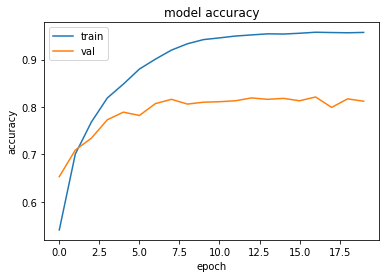

In [26]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

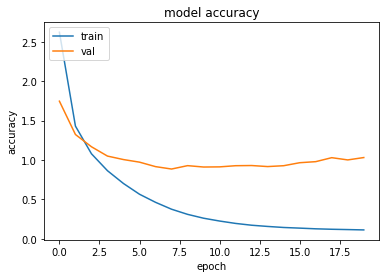

In [27]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

It seems our model starts over-fitting after 8 epochs. Let us train our model for 8 epochs.

In [29]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history=model.fit(partial_x_train,
          partial_y_train,
          epochs=8,
          batch_size=512,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/8
7982/7982 [==============================] - 1s 104us/step - loss: 2.6580 - accuracy: 0.5142 - val_loss: 1.7312 - val_accuracy: 0.6370
Epoch 2/8
7982/7982 [==============================] - 1s 95us/step - loss: 1.4266 - accuracy: 0.6978 - val_loss: 1.3230 - val_accuracy: 0.7120
Epoch 3/8
7982/7982 [==============================] - 1s 85us/step - loss: 1.0554 - accuracy: 0.7725 - val_loss: 1.1515 - val_accuracy: 0.7470
Epoch 4/8
7982/7982 [==============================] - 1s 88us/step - loss: 0.8410 - accuracy: 0.8185 - val_loss: 1.0332 - val_accuracy: 0.7760
Epoch 5/8
7982/7982 [==============================] - 1s 88us/step - loss: 0.6715 - accuracy: 0.8550 - val_loss: 0.9888 - val_accuracy: 0.7910
Epoch 6/8
7982/7982 [==============================] - 1s 92us/step - loss: 0.5443 - accuracy: 0.8872 - val_loss: 0.9359 - val_accuracy: 0.8070
Epoch 7/8
7982/7982 [==============================] - 1s 91us/step - loss: 0.4333 - ac

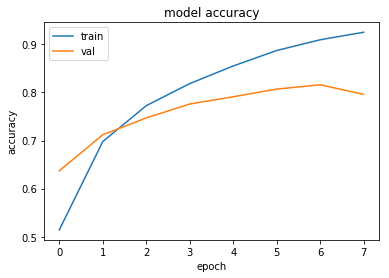

In [30]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

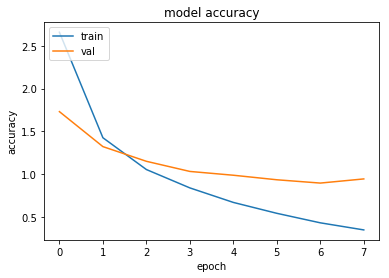

In [31]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
## Generating predictions

